In [0]:
import torch

In [0]:
tensor = torch.Tensor([[3, 4],
                       [7, 5]])
tensor

tensor([[3., 4.],
        [7., 5.]])

In [0]:
tensor.requires_grad

False

In [0]:
tensor.requires_grad_()

tensor([[3., 4.],
        [7., 5.]], requires_grad=True)

In [0]:
out = tensor * tensor

In [0]:
out.requires_grad

True

In [0]:
print(out.grad)

None


In [0]:
out = (tensor * tensor).mean()
print(out.grad_fn)

In [0]:
out.backward()

In [0]:
print(tensor.grad)

tensor([[1.5000, 2.0000],
        [3.5000, 2.5000]])


In [0]:
new_tensor = tensor * tensor
new_tensor.requires_grad

True

In [0]:
with torch.no_grad():

  new_tensor = tensor * tensor
  print('new_tensor = ', new_tensor)

  print('requires_grad for tensor = ', tensor.requires_grad)

  print('requires_grad for new_tensor = ', new_tensor.requires_grad)

new_tensor =  tensor([[ 9., 16.],
        [49., 25.]])
requires_grad for tensor =  True
requires_grad for new_tensor =  False


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

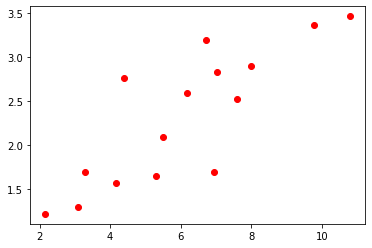

In [0]:
plt.plot(x_train, y_train, 'ro', label='Original Data')
plt.show()

In [0]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [0]:
input_size = 1
hidden_size = 100
output_size = 1
learning_rate = 1e-6

In [0]:
w1 = torch.rand(input_size,
                hidden_size,
                requires_grad=True)
w1.shape

torch.Size([1, 100])

In [0]:
w2 = torch.rand(hidden_size,
                output_size,
                requires_grad=True)
w2.shape

torch.Size([100, 1])

In [0]:
for iter in range(1, 301):
  y_pred = X_train.mm(w1).clamp(min=0).mm(w2)
  loss = (y_pred - Y_train).pow(2).sum()

  if iter%50==0:
    print(iter, loss.item())
  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate*w1.grad
    w2 -= learning_rate*w2.grad
    w1.grad.zero_()
    w2.grad.zero_()

50 3471.1494140625
100 90.40018463134766
150 5.943292140960693
200 3.694244384765625
250 3.6342713832855225
300 3.6326684951782227


In [0]:
print('w1: ', w1)
print('w2:', w2)

w1:  tensor([[ 5.7264e-01, -4.7401e-03, -5.4061e-03,  5.0731e-01,  8.6086e-01,
         -4.0812e-03,  3.9364e-01,  3.4409e-02,  1.1985e-01,  1.3438e-01,
          3.4790e-01,  5.7697e-01,  3.7291e-01, -4.6202e-03, -7.0328e-04,
          9.7698e-01,  7.7172e-01,  3.2964e-01,  3.9379e-01,  5.3899e-01,
          1.9957e-01,  1.2251e-01,  1.3300e-01,  5.2290e-01,  1.0437e-01,
         -8.8059e-03,  6.6986e-01,  5.4351e-01,  4.4595e-01,  8.5120e-01,
          4.5552e-01,  4.1280e-01, -5.4782e-03,  6.6614e-01,  1.6090e-01,
         -1.8729e-03,  5.0347e-01,  1.7277e-01,  4.7826e-01,  8.1754e-01,
          5.6316e-01,  5.2232e-01, -1.4577e-03,  8.8273e-01,  4.2186e-01,
          2.6540e-01,  3.1755e-01, -1.7474e-04, -5.7117e-03, -4.2046e-04,
         -5.0282e-03,  5.2888e-01,  5.8039e-01,  1.8428e-01,  7.4756e-01,
          3.7637e-01,  5.4102e-01,  6.1654e-01, -7.3213e-03,  7.6254e-01,
          1.4485e-02, -8.9195e-03,  8.9833e-01,  2.0042e-01,  6.8116e-01,
          5.1823e-01, -5.5131e-04

In [0]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [0]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[1.2123],
        [1.6164],
        [2.0205],
        [2.4651],
        [2.5459],
        [1.5312],
        [3.5925],
        [2.2711],
        [2.7883],
        [0.7961],
        [2.5870],
        [3.9643],
        [1.9518],
        [2.9379],
        [1.1388]], grad_fn=<MmBackward>)

In [0]:
predicted = predicted_in_tensor.detach().numpy()

In [0]:
predicted

array([[1.2123213 ],
       [1.6164281 ],
       [2.020536  ],
       [2.4650536 ],
       [2.5458748 ],
       [1.5311985 ],
       [3.5925112 ],
       [2.2710817 ],
       [2.7883396 ],
       [0.79609096],
       [2.5870204 ],
       [3.9642906 ],
       [1.9518371 ],
       [2.9378579 ],
       [1.1388472 ]], dtype=float32)

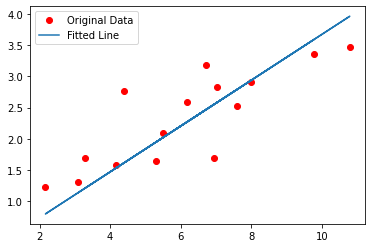

In [0]:
plt.plot(x_train, y_train, 'ro', label='Original Data')
plt.plot(x_train, predicted, label='Fitted Line')
plt.legend()
plt.show()